In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
print(df.head())

df['review'] = df['review'].apply(lambda x: f'"{x}"')

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)

review       0
sentiment    0
dtype: int64


In [4]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop]
    # Join back to string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply cleaning to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# Display cleaned text
print(df[['review', 'cleaned_review', 'sentiment']].head())

[nltk_data] Downloading package stopwords to C:\Users\Nikhil
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nikhil
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review  \
0  "One of the other reviewers has mentioned that...   
1  "A wonderful little production. <br /><br />Th...   
2  "I thought this was a wonderful way to spend t...   
3  "Basically there's a family where a little boy...   
4  "Petter Mattei's "Love in the Time of Money" i...   

                                      cleaned_review sentiment  
0  one reviewer mentioned watching oz episode you...  positive  
1  wonderful little production filming technique ...  positive  
2  thought wonderful way spend time hot summer we...  positive  
3  basically there family little boy jake think t...  negative  
4  petter matteis love time money visually stunni...  positive  


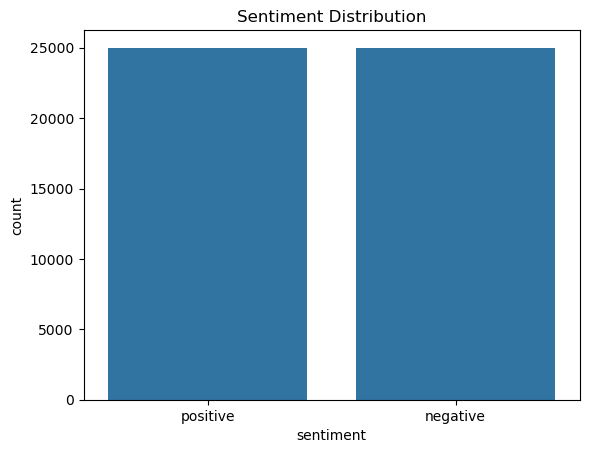

In [5]:
# Count of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [6]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Encode target variable
y = df['sentiment'].map({'positive':1, 'negative':0}).values

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 88.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



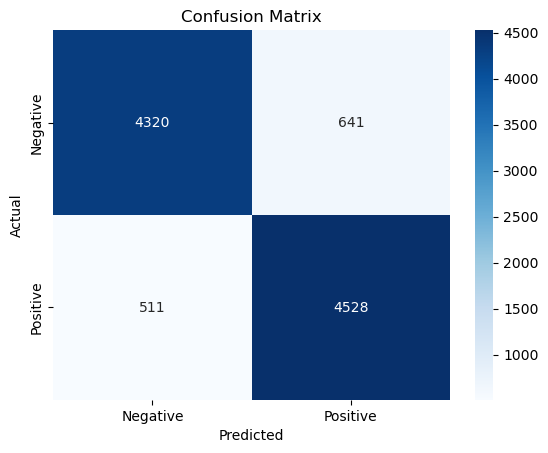

In [8]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
def predict_sentiment(review):
    # Clean the review
    cleaned = clean_text(review)
    # Vectorize
    vect = tfidf.transform([cleaned]).toarray()
    # Predict
    prediction = model.predict(vect)
    # Return sentiment
    return 'Positive' if prediction[0] == 1 else 'Negative'

In [10]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [11]:
user_review = input("Enter a movie review for sentiment analysis: ")
predicted_sentiment = predict_sentiment(user_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: Negative
